In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df = pd.read_csv('checked.csv')
df = df.loc[df.numax < 300]

In [10]:
print(f'Length {len(df)}')
print(f'Good {len(df.loc[df.error_flag==0])}')
print(f'Bad {len(df.loc[df.error_flag==1])}')
print(f'TODO {len(df.loc[df.error_flag==-1])}')

Length 1156
Good 1011
Bad 143
TODO 2


In [11]:
ddir = '~/mnt/rds/pbjam/PBjamResults/'

In [12]:
cols = ['dnu', 'numax', 'eps', 'd02', 'alpha', 'env_height', 'env_width', 'mode_width', 'teff', 'bp_rp']
good = pd.DataFrame(columns=cols)
ids = [n.ID for idx, n in df.iterrows() if n.error_flag == 0]

for id in ids:
    try:
        tmp = pd.read_csv(ddir + str(int(id)) + '_summary.csv').loc[2][cols].values
        good = good.append(pd.DataFrame(data=[tmp], columns=cols))
    except:
        print(f'failed on {id}')
        
bad = pd.DataFrame(columns=cols)
ids = [n.ID for idx, n in df.iterrows() if n.error_flag == 1]
for id in ids:
    try:
        tmp = pd.read_csv(ddir + str(int(id)) + '_summary.csv').loc[2][cols].values
        bad = bad.append(pd.DataFrame(data=[tmp], columns=cols))
    except:
        print(f'failed on {id}')

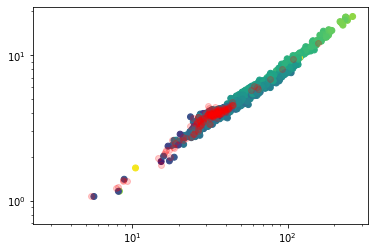

In [13]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
ax.scatter(good.numax, good.dnu, c=good.eps)
ax.scatter(bad.numax, bad.dnu, c='r', alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')

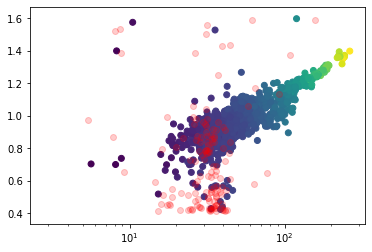

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(good.numax, good.eps, c=good.dnu)
ax.scatter(bad.numax, bad.eps, c='r', alpha=0.2)
ax.set_xscale('log')
#ax.set_yscale('log')

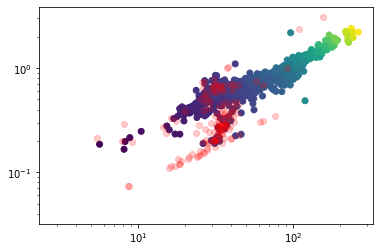

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(good.numax, good.d02,c=good.dnu)
ax.scatter(bad.numax, bad.d02, c='r', alpha=0.2)
ax.set_xscale('log')
ax.set_yscale('log')

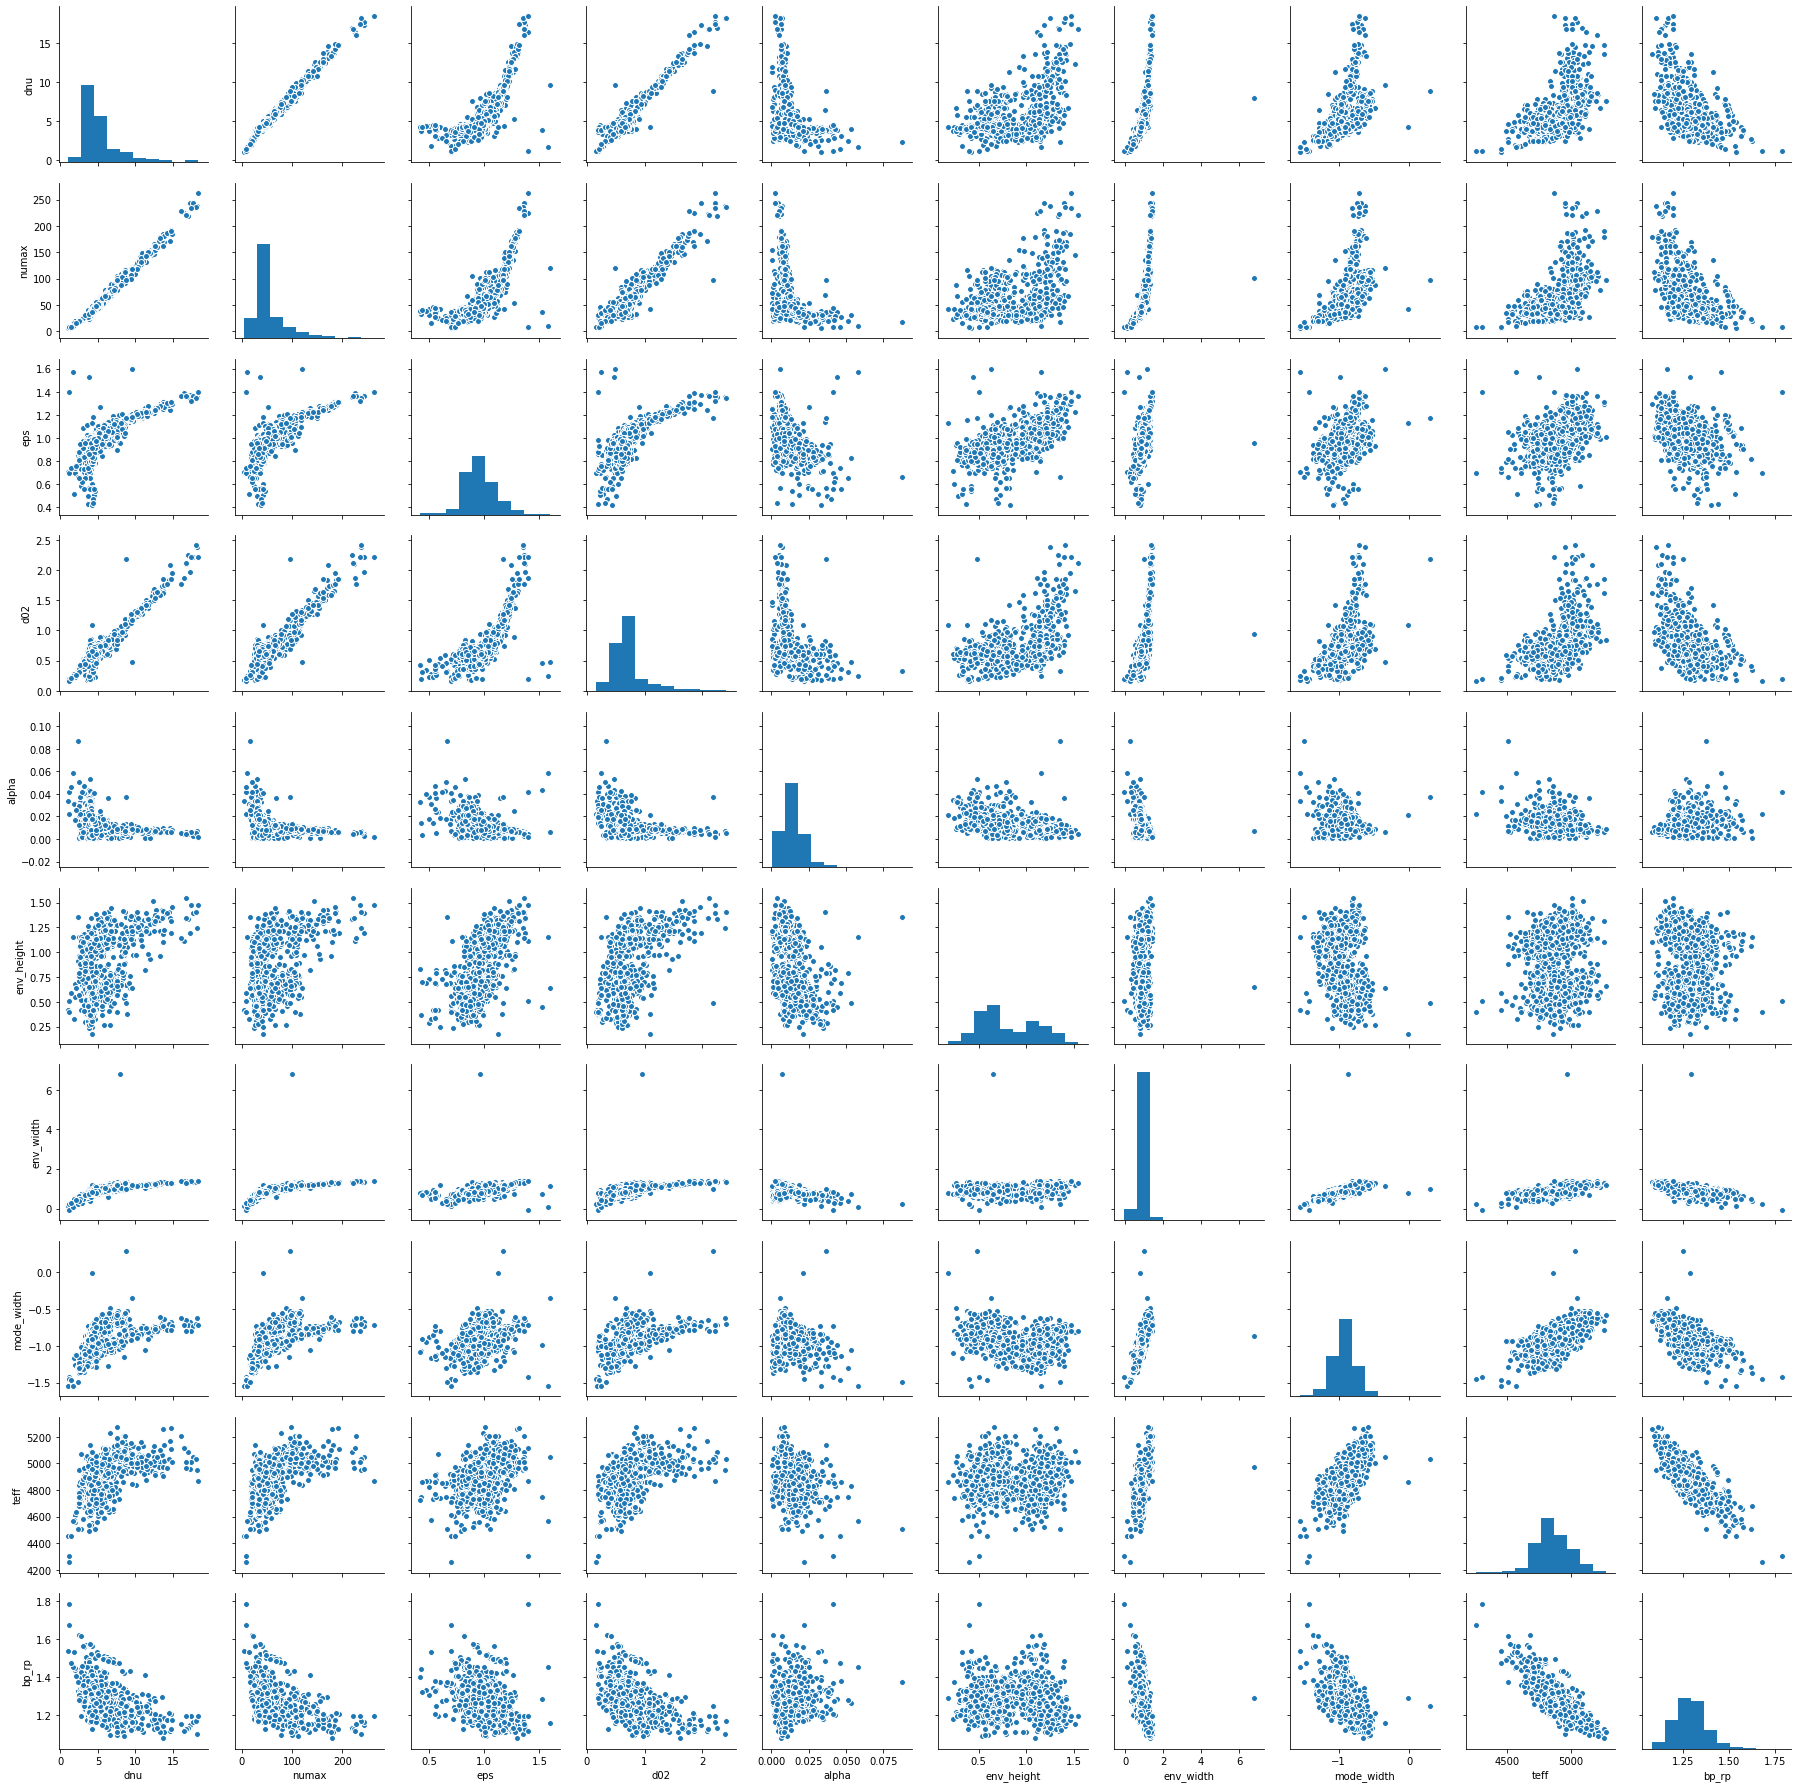

In [16]:
sns.pairplot(good)

In [57]:
good_log = good.copy()

In [58]:
good_log['dnu'] = np.log10(good.dnu)
good_log['numax'] = np.log10(good.numax)
good_log['d02'] = np.log10(good.d02)
good_log['alpha'] = np.log10(good.alpha)
good_log['teff'] = np.log10(good.teff)
good_log = good_log.loc[good_log.env_width < 2]
good_log = good_log.loc[good_log.mode_width < -0.4]
good_log = good_log.loc[good_log.alpha > -2.5]
good_log = good_log.loc[(good_log.dnu > 0.5) & (good_log.d02 > -0.4)]

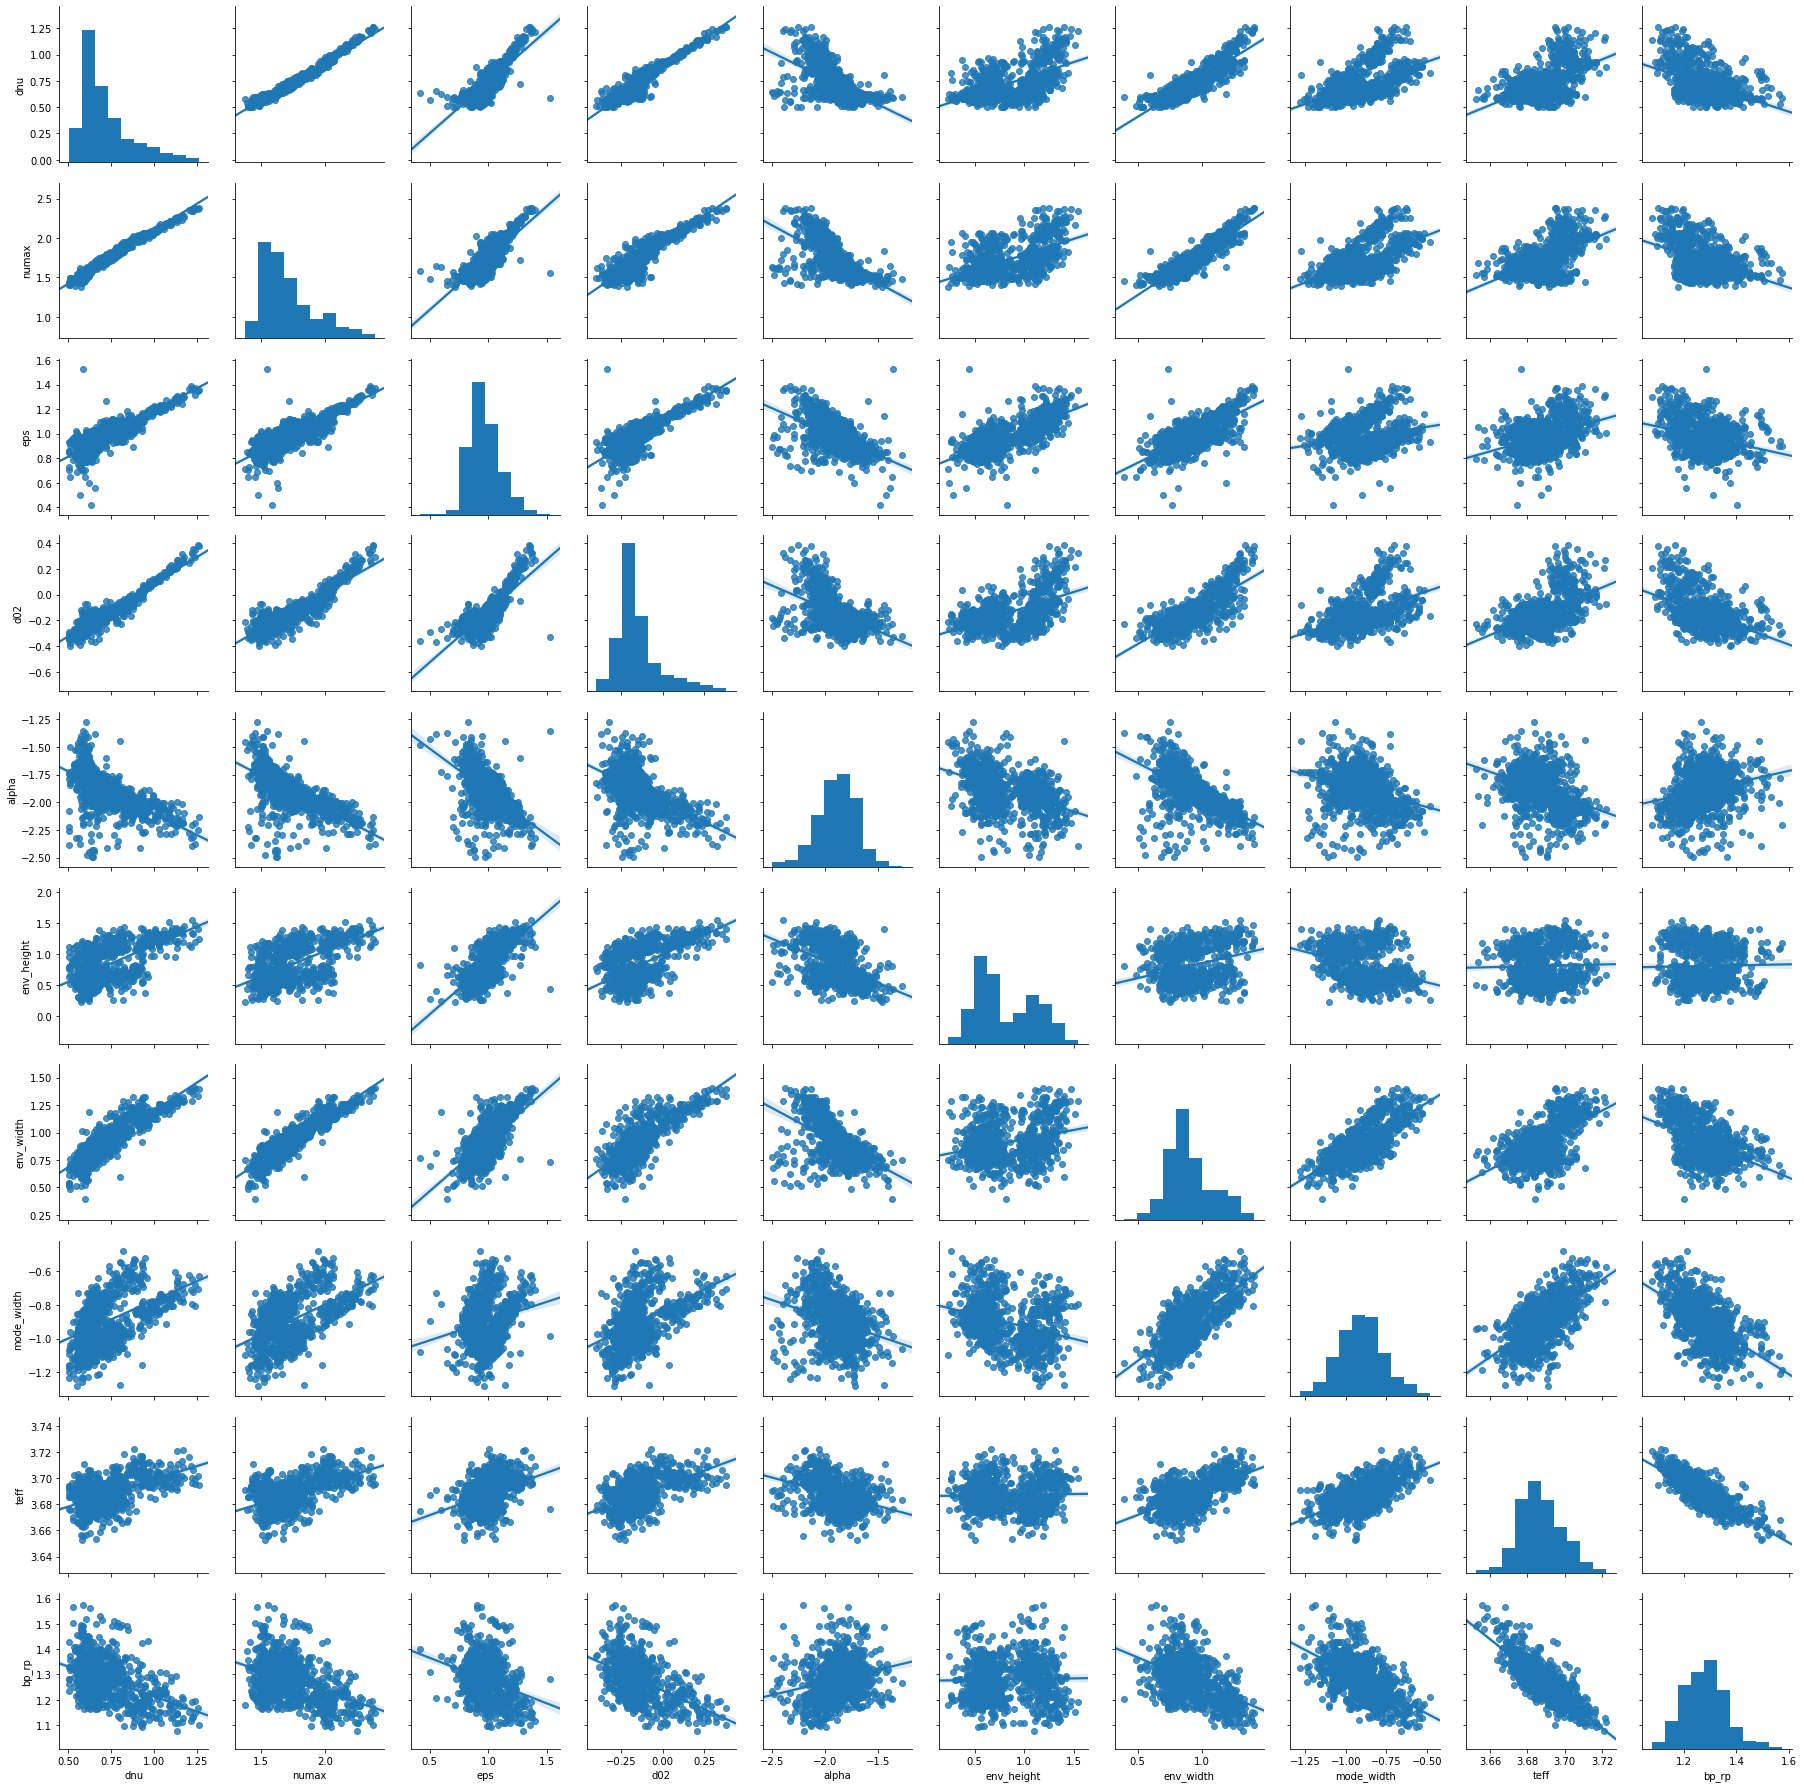

In [45]:
sns.pairplot(good_log, kind='reg')

/home/davies/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/davies/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


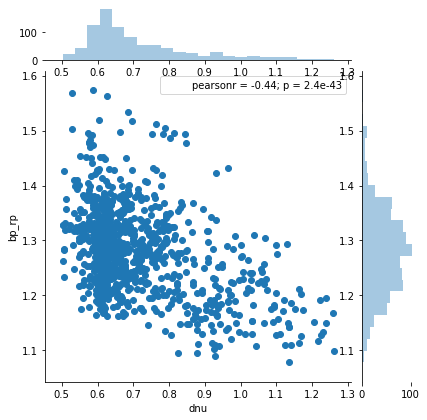

In [46]:
sns.jointplot(good_log['dnu'], good_log['bp_rp'])

/home/davies/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/home/davies/.local/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


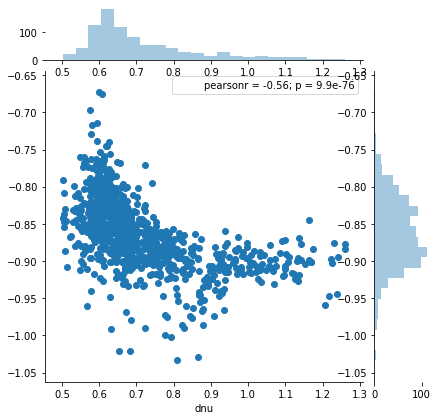

In [52]:
sns.jointplot(good_log['dnu'], (good_log['d02'] - good_log['dnu']))

In [51]:
print(len(good_log))

898


In [59]:
good_log.to_csv('prior_data_checked.csv')

In [68]:
cols = ['dnu', 'numax']#, 'teff', 'bp_rp', 'eps']
import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate(
                    data=good_log[cols].values,
                    var_type='cc',
                    bw='cv_ml')

/home/davies/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


In [69]:
print(kde.bw)

[0.00635482 0.01393895]


In [71]:
cols = ['dnu', 'numax', 'teff']#, 'bp_rp', 'eps']
import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate(
                    data=good_log[cols].values,
                    var_type='ccc',
                    bw='cv_ml')

/home/davies/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)
/home/davies/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


In [72]:
print(kde.bw)

[0.00741644 0.01247406 0.00517196]


In [73]:
cols = ['dnu', 'numax', 'teff', 'bp_rp', 'eps']
import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate(
                    data=good_log[cols].values,
                    var_type='ccccc',
                    bw='cv_ml')

/home/davies/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


In [74]:
print(kde.bw)

[0.0096003  0.01400131 0.00395036 0.03414201 0.04576334]


In [77]:
print(good_log.columns.values)

['dnu' 'numax' 'eps' 'd02' 'alpha' 'env_height' 'env_width' 'mode_width'
 'teff' 'bp_rp']


In [78]:
cols = good_log.columns.values

In [79]:
kde = sm.nonparametric.KDEMultivariate(
                    data=good_log[cols].values,
                    var_type='cccccccccc',
                    bw='cv_ml')

/home/davies/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


In [80]:
print(kde.bw)

[0.00774255 0.01441685 0.04582654 0.02127414 0.17830664 0.14219474
 0.04400531 0.06834085 0.0054522  0.11864199]
